<a href="https://colab.research.google.com/github/ydattatrey/The-Sparks-Foundation/blob/main/Task-1_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using supervised ML**
In this notebook, we will see how we use Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Task**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.







### Description of Dataset

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading & Getting Desciption of Dataset
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


So we have only two variables,namely - **Scores** which is also our target variable and **Hours** which is a explanatory variable.

As it is clear that our dataset contains no null values. Moving ahead, let's see how our data looks like although we get some sense of our data already.

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


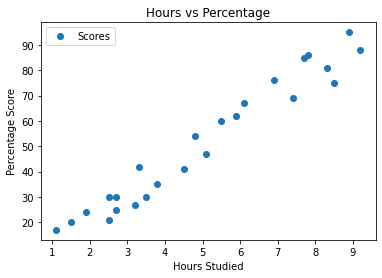

In [4]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From visual inspection, it is quite clear that Hours do explain Scores variable and there exists a positive correlation between them. So let's find out numerical value of correlation.

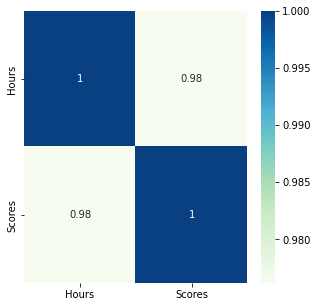

In [5]:
# Plotting Correlation Matrix
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot = True, cmap = 'GnBu')

From above we can see that Correlation between two variables is 0.98.Let move to next part of this notebook - Linear Regression.

For this we have to split data into two parts - training data & testing data.

In [6]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Splitting the data**

In this step, we divide the data into into two sets - Traing Data & Test Data

In [7]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(x_train,y_train)


LinearRegression(normalize=True)

In [9]:
coeff = model.coef_
intercept = model.intercept_
print(coeff,intercept)

[9.71054094] 2.7941966765998103


### **Testing the Algorithm**
Now we check with test values and see whether our model explains the same behaviour as that of population.

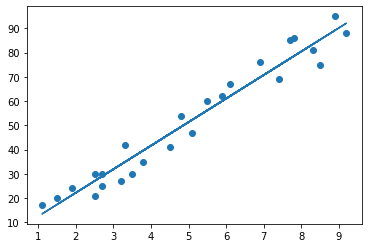

In [10]:
# Plotting the regression line
line = model.coef_*x + model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

We can conclude that our model is working absolutely fine as it shows strong positive correlation between variables just like actual dataset.

In [11]:
y_pred = model.predict(x_test)

# Comparing Actual and Predicted values
error = y_test - y_pred
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error' : error})
df_comp

,Actual,Predicted,Error
0,81,83.391686,-2.391686
1,30,27.070549,2.929451
2,21,27.070549,-6.070549
3,76,69.796929,6.203071
4,62,60.086388,1.913612
5,25,29.012657,-4.012657
6,42,34.838982,7.161018
7,47,52.317955,-5.317955


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.5


### **Making Prediction**
Now that we have trained our algorithm, it's time to solve the given problem 

In [13]:
# Hours studied = 9.5 hrs/day
Score = model.coef_* (9.5) + model.intercept_
print('The predicted score of astudent wil be',Score,'for 9.5 hrs/day.')

The predicted score of astudent wil be [95.04433557] for 9.5 hrs/day.
